In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.8.0
TFP version: 0.14.0


In [5]:
from tensorflow.python.client import device_lib
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [6]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions

- batch shape: B = # of distribution 
- event shape: E  =# of events per distribution

- sample shape for S samples = (S, B, E)

- prob shape: (B) since only B distribution. all events are sampled from same prob.



## Coding Tutorials
#### 1. [Univariate Distributions](#univariate_distributions)
#### 2. [Multivariate Distributions](#multivariate_distributions)
#### 3. [The Independent Distribution](#the_independent_distribution)
#### 4. [Sampling and log probs](#sampling_and_log_probs)
#### 5. [Trainable Distributions](#trainable_distributions)

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [8]:
# Create a normal distribution from Tensorflow Distributions

normal=tfd.Normal(loc=0,scale=1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [9]:
# Sample from the chosen distribution...
normal.sample()


<tf.Tensor: shape=(), dtype=float32, numpy=-0.89808375>

In [10]:
# ... or sample multiple times
normal.sample(3)


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.33875433,  0.3449861 , -0.6605785 ], dtype=float32)>

In [11]:
# Obtain value of probability's density
normal.prob(2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.05399096>

In [12]:
# Obtain value of logprobability
normal.log_prob(2)


<tf.Tensor: shape=(), dtype=float32, numpy=-2.9189386>

In [13]:
# Verify that this really is the log of the probability
np.log(normal.prob(2))


-2.9189386

In [22]:
sample = normal.sample(1000).numpy()

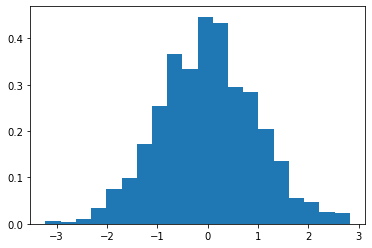

In [23]:
# Plot a histogram, approximating the density
plt.hist(sample, bins=20, density=True)
plt.show()

In [24]:
# Do the same for the exponential distribution
exp = tfd.Exponential(0.2)
exp

<tfp.distributions.Exponential 'Exponential' batch_shape=[] event_shape=[] dtype=float32>

In [25]:
exp.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.3702826, 4.084205 , 0.8894131], dtype=float32)>

In [26]:
# Sample as before
exp.sample()


<tf.Tensor: shape=(), dtype=float32, numpy=1.6448544>

In [27]:

exp.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.1999999>

In [28]:
exp.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.6094384>

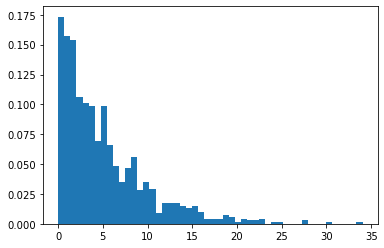

In [29]:
exp_sample = exp.sample(1000).numpy()
_=plt.hist(exp_sample, bins=50, density=1)

In [30]:
# Create a Bernoulli distribution (discrete)
ber = tfd.Bernoulli(probs=0.8)

#### A word of caution on discrete distributions

In [34]:
# Calculate Bernoulli prob and see that 0.5 and -1 do not give the correct probability!
for k in [0,0.5,1,-1]:
    print('prob result {:.2f} for k = {} '.format(ber.prob(k), k))

prob result 0.20 for k = 0 
prob result 0.40 for k = 0.5 
prob result 0.80 for k = 1 
prob result 0.05 for k = -1 


In [35]:
# Replicate the scores to see what is occurring under the hood

def my_bernoulli(p_sucess, k):
    return np.power(p_sucess,k)*np.power((1-p_sucess),(1-k))

In [39]:
# Evaluate it as before
for k in [0,0.5,1,-1]:
    out = my_bernoulli(0.8, k)
    print('prob result {:.2f} for k = {} '.format(out, k))

prob result 0.20 for k = 0 
prob result 0.40 for k = 0.5 
prob result 0.80 for k = 1 
prob result 0.05 for k = -1 


#### Work with batch distributions

In [40]:
# Create a batched Bernoulli distribution
bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [41]:
# Sample from it, noting the shape
bernoulli_batch.sample(2)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[1, 0, 1, 0, 1],
       [0, 0, 1, 1, 1]], dtype=int32)>

In [42]:
# Use a batch shape with higher rank

probs = [[[0.5, 0.5], 
          [0.8, 0.3], 
          [0.25, 0.75]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [43]:
# Sample from this batch of distributions
bernoulli_batch_2D.sample(2)

<tf.Tensor: shape=(2, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 0],
         [1, 0],
         [0, 0]]],


       [[[0, 0],
         [1, 1],
         [0, 1]]]], dtype=int32)>

In [44]:
# Determine probabilities from this batch distribution
bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5 , 0.5 ],
        [0.2 , 0.7 ],
        [0.25, 0.75]]], dtype=float32)>

In [45]:
bernoulli_batch_2D.prob([[1,0]]) 

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[0.5 , 0.5 ],
        [0.8 , 0.7 ],
        [0.25, 0.25]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions

In [46]:
norm = tfd.Normal(loc=[0,0], scale=[1,1])
norm

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [47]:
norm.sample(2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.29961362,  0.4780554 ],
       [-0.927401  ,  0.5824271 ]], dtype=float32)>

In [48]:
norm.prob([0.5,0.5])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.35206535, 0.35206535], dtype=float32)>

In [49]:
# Define 2D multivariate Gaussian with diagonal covariance matrix
normal_diag = tfd.MultivariateNormalDiag(loc=[0,1], scale_diag=[1,2])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [50]:
# Sample from it
normal_diag.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.5220494 ,  1.2873967 ],
       [ 0.9382226 ,  0.34771925],
       [-0.997453  ,  2.6687226 ],
       [-0.31411338, -0.9828315 ],
       [ 0.8817882 ,  3.0646052 ]], dtype=float32)>

In [51]:
normal_diag.prob([1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.04826618>

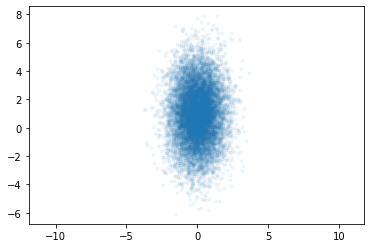

In [52]:
# Make a plot
plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [53]:
normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0,0]], scale_diag=[[1,2]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[1] event_shape=[2] dtype=float32>

In [54]:
# Create three "batches" of multivariate normals
normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0,0],[0,0],[0,0]], scale_diag=[[1,2],[2,1],[2,2]])
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [55]:
# Sample from it
samples=normal_diag_batch.sample(3)
samples

<tf.Tensor: shape=(3, 3, 2), dtype=float32, numpy=
array([[[ 0.00455205, -1.2296776 ],
        [-0.14299452, -1.0030683 ],
        [-0.19874515, -0.62147903]],

       [[ 0.06312805,  3.0725172 ],
        [ 2.0431945 ,  0.4109658 ],
        [-0.20280242,  1.4791255 ]],

       [[-0.58614415, -1.201455  ],
        [-4.0512257 ,  1.5814993 ],
        [-3.1452112 ,  3.1706934 ]]], dtype=float32)>

In [56]:
# Compute log probs
normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-2.720048 , -3.0366533, -3.2773883],
       [-3.713062 , -3.137301 , -3.502789 ],
       [-2.8832436, -5.833148 , -5.7173777]], dtype=float32)>

In [57]:
# Create a sample for a plot -- notice the shape
plt_sample_batch = normal_diag_batch.sample(10000)

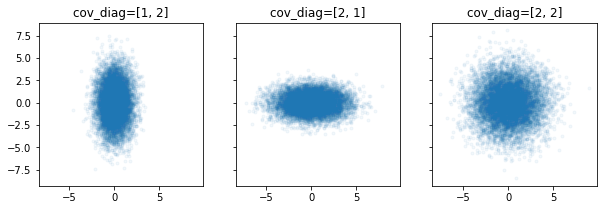

In [58]:
# Plot samples from the batched multivariate Gaussian
fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]','cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] #take the ith batch [samples x event_shape]
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()



***
<a id='the_independent_distribution'></a>
## The Independent Distribution

In [59]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components
locs = [-1,1]
scales = [0.5, 1.]
batch_of_normals = tfd.Normal(loc=locs, scale=scales)
batch_of_normals

<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [60]:
batch_of_normals.prob([0,0])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.10798192, 0.24197073], dtype=float32)>

In [61]:
batch_of_normals.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.2212462,  2.3551147], dtype=float32)>

In [62]:
t = np.linspace(-4, 4, 10)
np.repeat(t[:, np.newaxis], 2, axis=1)

array([[-4.        , -4.        ],
       [-3.11111111, -3.11111111],
       [-2.22222222, -2.22222222],
       [-1.33333333, -1.33333333],
       [-0.44444444, -0.44444444],
       [ 0.44444444,  0.44444444],
       [ 1.33333333,  1.33333333],
       [ 2.22222222,  2.22222222],
       [ 3.11111111,  3.11111111],
       [ 4.        ,  4.        ]])

/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

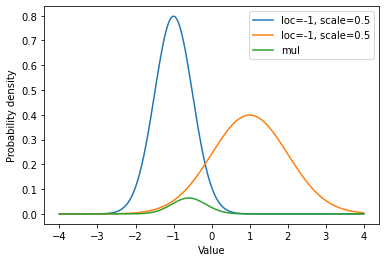

In [63]:
# Univariate density functions

import seaborn as sns

t = np.linspace(-4, 4, 10000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 0] * densities[:, 1], label='mul')

plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [64]:
# Check their batch_shape and event_shape
batch_of_normals


<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [67]:
# Use Independent to convert the batch shape to the event shape

bivariate_normal_from_Independent = tfd.Independent(batch_of_normals, reinterpreted_batch_ndims=1)
bivariate_normal_from_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

In [65]:
tf.random.set_seed(123)
batch_of_normals.sample(2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.4490418 , -0.8259145 ],
       [-1.222209  , -0.48829472]], dtype=float32)>

In [68]:
tf.random.set_seed(123)
bivariate_normal_from_Independent.sample(2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.4490418 , -0.8259145 ],
       [-1.222209  , -0.48829472]], dtype=float32)>

In [69]:
t0 = np.transpose([np.linspace(-4, 4, 1000)])

In [70]:
# Note that dimension from batch_shape has shifted to event_shape
probs = bivariate_normal_from_Independent.prob(t0)

/datascope/slurm/miniconda3/envs/viska-tf28/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


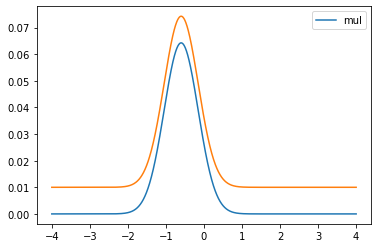

In [71]:
sns.lineplot(t, densities[:, 0] * densities[:, 1], label='mul')
plt.plot(t0,probs+0.01)

In [ ]:

bivariate_normal_from_Independent.prob()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


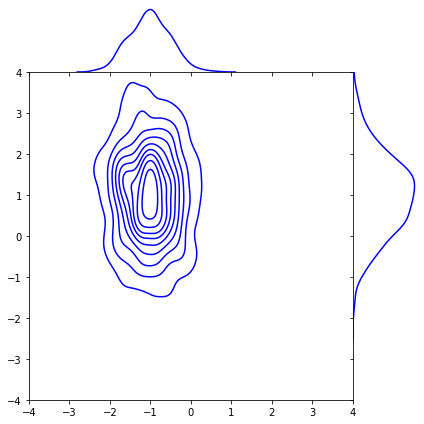

In [ ]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_Independent.sample(1000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

In [ ]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)
bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc=locs, scale_diag=scales)
bivariate_normal_from_Multivariate

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


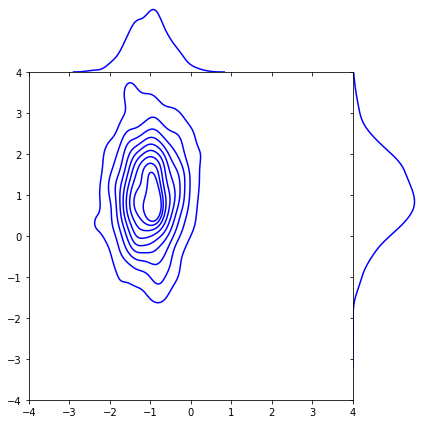

In [ ]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(1000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [ ]:
tt = tfd.Normal(loc=[0,0], scale=[1,1])
probb =tt.prob([1,0.5])
probb

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.24197073, 0.35206532], dtype=float32)>

In [ ]:
tt2 = tfd.Independent(tt, reinterpreted_batch_ndims=1)
tt2.prob([1,0.5])

<tf.Tensor: shape=(), dtype=float32, numpy=0.08518951>

In [ ]:
tf.math.multiply(*probb)

<tf.Tensor: shape=(), dtype=float32, numpy=0.08518951>

In [ ]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [ ]:
# Highlight batch_shape
normals_batch_3by2_event_1


<tfp.distributions.Normal 'Normal' batch_shape=[3, 2] event_shape=[] dtype=float32>

In [ ]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid
normals_batch_3by2_event_2 = tfd.Independent(normals_batch_3by2_event_1)
normals_batch_3by2_event_2

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [ ]:
# Evaluate log_prob
normals_batch_3by2_event_2.log_prob([[-10,10],[100,100],[1,1]])


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-4.1146406e+03, -4.1404624e+00, -2.8378770e+00], dtype=float32)>

In [ ]:
# Can reinterpret _all_ batch dimensions as event dimensions



In [ ]:
# Take log_probs 



#### Using `Independent` to build a Naive Bayes classifier

#### Introduction to `newsgroups` data set

In this tutorial, just load the dataset, fetch train/test splits, probably choose a subset of the data.

Construct the class conditional feature distribution (with Independent, using the Naive Bayes assumption) and sample from it.

We can just use the ML estimates for parameters, in later tutorials we will learn them.

#### Import the data

The dataset required for this coding tutorial can be downloaded from the following link:

https://drive.google.com/file/d/1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm/view?usp=sharing

You should store this file in Drive for use in this Colab notebook.

In [75]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [73]:
# Convenience function for retrieving the 20 newsgroups data set

# Usenet was a forerunner to modern internet forums
# Users could post and read articles
# Newsgroup corresponded to a topic
# Example topics in this data set: IBM computer hardware, baseball
# Our objective is to use an article's contents to predict its newsgroup,
# a 20-class classification problem.

# 18000 newsgroups, posts on 20 topics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


In [76]:
# Get the train data

data = fetch_20newsgroups(data_home="20_Newsgroup_Data/", subset="train")

In [ ]:
# More information about the data set
# print(data["DESCR"])

In [ ]:
# Example article
print(data["data"][0])


In [ ]:
# Associated label

data["target"][0]

7

In [ ]:
# Name of label
data["target_names"][7]


'rec.autos'

In [ ]:

newsgroups_data = data

In [ ]:
# Preprocessing boilerplate

n_documents = len(newsgroups_data['data'])

count_vectorizer = CountVectorizer(input='content', binary=True,
                                   max_df=0.25, min_df=1.01/n_documents) # ignore common words, words that appear once
binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_data['data']) # input is a list of strings


In [ ]:

binary_bag_of_words[0,:]

<1x56365 sparse matrix of type '<class 'numpy.int64'>'
	with 55 stored elements in Compressed Sparse Row format>

In [ ]:

n_documents

11314

In [ ]:
# Check shape
binary_bag_of_words.shape


(11314, 56365)

In [ ]:

binary_bag_of_words[0,:].shape

(1, 56365)

In [ ]:

print(binary_bag_of_words[0,31701])

1


In [ ]:
#Check that the fit has been successful
count_vectorizer.inverse_transform(binary_bag_of_words[0,:])

[array(['lerxst', 'wam', 'umd', 'where', 'thing', 'car', 'rac3',
        'maryland', 'college', 'park', '15', 'wondering', 'anyone',
        'could', 'enlighten', 'saw', 'day', 'door', 'sports', 'looked',
        'late', '60s', 'early', '70s', 'called', 'bricklin', 'doors',
        'were', 'really', 'small', 'addition', 'front', 'bumper',
        'separate', 'rest', 'body', 'tellme', 'model', 'name', 'engine',
        'specs', 'years', 'production', 'made', 'history', 'whatever',
        'info', 'funky', 'looking', 'please', 'mail', 'thanks', 'il',
        'brought', 'neighborhood'], dtype='<U80')]

In [ ]:
# Dict that will be useful later 

inv_vocabulary = {value:key for key, value in count_vectorizer.vocabulary_.items()}

#### A Naive Bayes classifier for `newsgroup`

Each feature vector $x$ is a list of indicators for whether a word appears in the article. $x_i$ is 1 if the $i$th word appears, and 0 otherwise. `inv_vocabulary` matches word indices $i$ to words.

Each label $y$ is a value in $0, 1, \ldots, 19$.

The parts of a naive Bayes classifier for this problem can be summarised as:  


- A probability distribution for the feature vector by class, $p(x|y = j)$ for each $j = 0, 1, \ldots, 19$. These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$. This parameter is the probability of observing word $i$ in an article of class $j$. 

- We will use the Laplace smoothed maximum likelihood estimate to compute these parameters. Laplace smoothing involves adding small counts to every feature for each class. Else, if a feature did not appear in the training set of a class, but then we observed it in our test data the log probability would be undefined.

- A collection of class prior probabilities $p(y = j)$. These will be set by computing the class base rates in the training set.  


- A function for computing the probability of class membership via Bayes' theorem:  

\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [72]:
# Compute the parameter estimates (adjusted fraction of documents in class that contain word)

n_classes = newsgroups_data['target'].max() + 1
y = newsgroups_data['target']
n_words = binary_bag_of_words.shape[1]

alpha = 1e-6 # parameters for Laplace smoothing

theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
for c_k in range(n_classes): # 0, 1, ..., 19
    class_mask = (y == c_k)
    N = class_mask.sum() # number of articles in class
    theta[c_k, :] = (binary_bag_of_words[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2) # 2: 0 or 1 is the # possible output

NameError: name 'newsgroups_data' is not defined

In [ ]:

n_classes

20

In [ ]:

j

19

In [ ]:

ix

25977

In [ ]:

theta[19, 25977]

0.4190981436652618

In [ ]:
# Check whether the most probable word in each class is reasonable

most_probable_word_ix = theta.argmax(axis=1) # most probable word for each class

for j, ix in enumerate(most_probable_word_ix):
    print('Most probable word in class {} is "{}".'.format(newsgroups_data['target_names'][j],
                                                           inv_vocabulary[ix]), end="")
    print(f'with freq {theta[j, ix]:.2f}')

Most probable word in class alt.atheism is "people".with freq 0.41
Most probable word in class comp.graphics is "graphics".with freq 0.35
Most probable word in class comp.os.ms-windows.misc is "windows".with freq 0.68
Most probable word in class comp.sys.ibm.pc.hardware is "thanks".with freq 0.35
Most probable word in class comp.sys.mac.hardware is "mac".with freq 0.37
Most probable word in class comp.windows.x is "window".with freq 0.32
Most probable word in class misc.forsale is "sale".with freq 0.61
Most probable word in class rec.autos is "car".with freq 0.55
Most probable word in class rec.motorcycles is "dod".with freq 0.53
Most probable word in class rec.sport.baseball is "he".with freq 0.47
Most probable word in class rec.sport.hockey is "ca".with freq 0.45
Most probable word in class sci.crypt is "clipper".with freq 0.53
Most probable word in class sci.electronics is "use".with freq 0.36
Most probable word in class sci.med is "reply".with freq 0.32
Most probable word in class 

In [ ]:
# Define a distribution for each class
batch_of_bernoullis = tfd.Bernoulli(probs=theta)
batch_of_bernoullis

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[20, 56365] event_shape=[] dtype=int32>

In [ ]:
p_x_given_y = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
p_x_given_y

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[20] event_shape=[56365] dtype=int32>

In [ ]:
# Take a sample of words from each class
n_samples = 10
sample = p_x_given_y.sample(n_samples)
sample.shape

TensorShape([10, 20, 56365])

In [ ]:
# Choose a class

chosen_class = 15
newsgroups_data['target_names'][chosen_class]

'soc.religion.christian'

In [ ]:
# Indicators for words that appear in the sample

class_sample = sample[:, chosen_class, :]
class_sample

<tf.Tensor: shape=(10, 56365), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
# Perform inverse transform to test quality of fit
count_vectorizer.inverse_transform([class_sample[0]])


[array(['14', '1992', '1993', '51', '542', '98', 'abstinence', 'ai',
        'allowed', 'altogether', 'anger', 'another', 'appeal', 'apply',
        'astrophysics', 'athena', 'au', 'babylon', 'because', 'been',
        'best', 'bowermaster', 'buddhist', 'capital', 'christians',
        'circa', 'claiming', 'comes', 'committed', 'conclusion',
        'constant', 'contested', 'contra', 'corporation', 'countless',
        'course', 'create', 'days', 'debated', 'details', 'did', 'doubt',
        'down', 'each', 'end', 'evil', 'expect', 'explain', 'expressed',
        'find', 'giaeb', 'god', 'gospel', 'grail', 'great', 'had',
        'handle', 'he', 'his', 'however', 'incident', 'interesting',
        'investigate', 'its', 'jason', 'jesus', 'justify', 'kulikauskas',
        'lay', 'less', 'let', 'lives', 'look', 'maybe', 'mean', 'men',
        'message', 'much', 'must', 'need', 'new', 'number', 'off', 'ogden',
        'opposed', 'others', 'overwhelming', 'particularly', 'passages',
        

***
<a id='sampling_and_log_probs'></a>
## Sampling and log probs

In [3]:
# Make Multivariate Distribution

normal_distributions = tfd.MultivariateNormalDiag(loc=[[0.5, 1], [0.1, 0], [0, 0.2]],
                                 scale_diag=[[2, 3], [1, 3], [4, 4]])
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [4]:
# Sample
normal_distributions.sample()


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.2961674, -3.4648843],
       [-1.7259144, -2.356639 ],
       [-1.7776723,  0.9847862]], dtype=float32)>

In [5]:
# Multivariate Normal batched Distribution
# We are broadcasting batch shapes of `loc` and `scal_diag` 
# against each other

loc = [[[0.3, 1.5, 1.], [0.2, 0.4, 2.8]],
        [[2., 2.3, 8], [1.4, 1, 1.3]]]
# loc = [[0,0,0,]]
scale_diag = [0.4, 1., 0.7]
normal_distributions = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
normal_distributions

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[2, 2] event_shape=[3] dtype=float32>

In [6]:
np.array(loc).shape

(2, 2, 3)

In [7]:
# Use independent to move part of the batch shape
ind_normal_distributions= tfd.Independent(normal_distributions, reinterpreted_batch_ndims=1)
ind_normal_distributions

<tfp.distributions.Independent 'IndependentMultivariateNormalDiag' batch_shape=[2] event_shape=[2, 3] dtype=float32>

In [8]:
# Draw some samples
samples = ind_normal_distributions.sample(5)
samples.shape


TensorShape([5, 2, 2, 3])

In [9]:
# `[B, E]` shaped input

inp = tf.random.uniform([2,2,3])
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-10.683702, -70.85609 ], dtype=float32)>

In [10]:
# `[E]` shaped input (broadcasting over batch size)
inp = tf.random.uniform((2,3))
ind_normal_distributions.log_prob(inp)


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -9.249443, -75.61279 ], dtype=float32)>

In [14]:
test = np.array([inp,inp])
test.shape

(2, 2, 3)

In [15]:
ind_normal_distributions.log_prob(test)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -9.249443, -75.61279 ], dtype=float32)>

In [ ]:
#`[S, B, E]` shaped input (broadcasting over samples)

inp = tf.random.uniform((9, 2, 2,3))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[-11.1896305, -74.15888  ],
       [ -8.662303 , -76.68224  ],
       [ -8.310175 , -71.92856  ],
       [ -9.872419 , -77.74613  ],
       [ -9.839038 , -70.848335 ],
       [ -8.425177 , -64.63274  ],
       [-12.257543 , -78.14155  ],
       [ -9.952727 , -61.090668 ],
       [ -9.862118 , -69.29745  ]], dtype=float32)>

In [ ]:
# `[S, b, e]` shaped input, where [b, e] is broadcastable over [B, E]

inp = tf.random.uniform((9, 1, 2,1))
ind_normal_distributions.log_prob(inp)

<tf.Tensor: shape=(9, 2), dtype=float32, numpy=
array([[ -9.183877, -71.40644 ],
       [-10.467295, -82.413666],
       [-10.970928, -64.05264 ],
       [ -9.806834, -59.14113 ],
       [-11.69374 , -87.48183 ],
       [-11.948297, -72.115746],
       [-11.82281 , -66.42183 ],
       [-11.161443, -70.49489 ],
       [ -9.692514, -61.308758]], dtype=float32)>

#### Naive Bayes example

Lets now use what we have learned and continue the Naive Bayes classifier we were building last tutorial.

#### Import the data

The dataset required for this coding tutorial can be downloaded from the following link:

https://drive.google.com/file/d/1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm/view?usp=sharing

You should store this file in Drive for use in this Colab notebook.

In [17]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [19]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):
    
    newsgroups_train_data = fetch_20newsgroups(data_home='/path/to/20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='/path/to/20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_test_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents)
    
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data'])
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])

These probability distributions are assumed to have independent components: we can factorize the joint probability as a product of marginal probabilities
\begin{equation}
    p(x|y = j) = \prod_{i=1}^d p(x_i|y = j)
\end{equation}
These marginal probability distributions are Bernoulli distributions, each of which has a single parameter $\theta_{ji} := p(x_i = 1|y = j)$.

In [22]:

def laplace_smoothing0(total_counts, N, alpha):
  return (total_counts + alpha) / (N + alpha * 2)

In [77]:

def get_theta(labels, binary_data, n_classes, alpha=1):
    theta = np.zeros((n_classes, binary_data.shape[1]))
    for c_k in range(n_classes):
        class_masks = (labels == c_k)
        class_data = binary_data[class_masks]
        N = class_data.sum()
        total_counts = class_data.sum(axis=0)
        theta[c_k] = laplace_smoothing0(total_counts, N, alpha)
    return theta

In [93]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = get_theta(labels=train_labels, binary_data=train_data, n_classes=len(categories))

In [105]:
# Defining a function to conduct Laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [106]:
# Getting a subset of the 20 newsgroup dataset

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories=categories)
smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

In [107]:

smoothed_counts.shape

(4, 17495)

In [121]:

smoothed_counts00= np.copy(smoothed_counts)

In [124]:
tt = get_theta(labels=train_labels, binary_data=train_data, n_classes=len(categories))


In [126]:
tt

array([[6.62767385e-05, 1.98830216e-04, 1.65691846e-05, ...,
        1.65691846e-05, 1.65691846e-05, 1.65691846e-05],
       [4.22433215e-04, 2.41390409e-04, 2.01158674e-05, ...,
        2.01158674e-05, 2.21274541e-04, 6.03476022e-05],
       [2.95726748e-04, 5.64569247e-04, 4.03263748e-05, ...,
        1.34421249e-05, 1.34421249e-05, 1.34421249e-05],
       [9.97227707e-05, 1.59556433e-04, 1.99445541e-05, ...,
        5.98336624e-05, 1.99445541e-05, 1.99445541e-05]])

In [123]:

smoothed_counts00

array([[0.00829876, 0.02489627, 0.00207469, ..., 0.00207469, 0.00207469,
        0.00207469],
       [0.03583618, 0.02047782, 0.00170648, ..., 0.00170648, 0.01877133,
        0.00511945],
       [0.03697479, 0.07058824, 0.00504202, ..., 0.00168067, 0.00168067,
        0.00168067],
       [0.01319261, 0.02110818, 0.00263852, ..., 0.00791557, 0.00263852,
        0.00263852]])

In [ ]:


test_data.shape

(1353, 17495)

To now make our NB classifier we need to build three functions:
* Compute the class priors
* Build our class conditional distributions
* Put it all together and classify our data

class_priors:  
$$p(y=j)$$

calculating: 
\begin{equation}
    p(y = j|x) = \frac{p(x|y = j)p(y = j)}{p(x)}
\end{equation}

In [108]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [109]:
np.where(train_labels==1, 1, 0)


array([1, 0, 0, ..., 1, 0, 1])

In [110]:

train_labels

array([1, 3, 2, ..., 1, 0, 1])

In [111]:
# Run the function 
priors = class_priors(len(categories), labels=train_labels)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


make distribution P(x):
$$ P(x) ∼ Bernoulli $$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


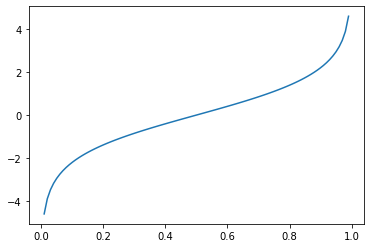

In [112]:
x = np.linspace(0,1, 100)
plt.plot(x, np.log(x/(1-x)))

In [113]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.
def make_distribution(probs):
  batch_of_bernoullis = tfd.Bernoulli(probs=probs)
  dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
  return dist

In [114]:
batch_of_bernoullis = tfd.Bernoulli(probs=smoothed_counts)



In [115]:
batch_of_bernoullis

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[4, 17495] event_shape=[] dtype=int32>

In [116]:
tf_dist = make_distribution(smoothed_counts)
tf_dist

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[4] event_shape=[17495] dtype=int32>

cond_probs $P(x|y=j)$:
$$P(x|y=j) = \prod_i^d P(x_i|y=j) $$
$$\theta_{ji} : = P(x_i=1|y=j)$$
priors $P(y)$:
$$P(y=j) = \frac{N_j}{N}, N = \sum_j N_j$$
joint_llh $P(x,y)$:
$$P(x,y) = P(x|y)p(y)$$
posterior $P(y=j|x)$:
$$\log P(y=j|x) = \log P(x|y=j) + \log P(y=j) - \log P(x)$$

In [117]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob
def predict_sample(dist, sample, priors):
  cond_probs = dist.log_prob(sample)
  log_priors = tf.cast(tf.math.log(priors), "float32")
  joint_likelihood = log_priors +  cond_probs
  # norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=1, keepdims=True)
  norm_factor = tf.math.reduce_logsumexp(joint_likelihood)
  log_prob = joint_likelihood - norm_factor
  return log_prob


#### Computing log_probs

In [118]:
# Predicting one example from our test data
log_probs = predict_sample(tf_dist, test_data[0], priors)
log_probs

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([-6.1736267e+01, -1.5258789e-05, -1.1619888e+01, -6.3327835e+01],
      dtype=float32)>

In [119]:
# Loop over our test data and classify.

probabilities = []
for sample, label in zip(test_data, test_labels):
    probabilities.append(tf.exp(predict_sample(tf_dist, sample, priors)))

probabilities = np.asarray(probabilities)
predicted_classes = np.argmax(probabilities, axis =-1)
print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.7848499112849504


In [104]:
# Make a Bernoulli Naive Bayes classifier using sklearn with the same level of alpha smoothing. 

clf = BernoulliNB(alpha=1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


f1 from sklean  0.7848499112849504


In [ ]:
clf = BernoulliNB(alpha=0.1)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


f1 from sklean  0.8496961488207146


In [ ]:
clf = BernoulliNB(alpha=0.01)
clf.fit(train_data, train_labels)
pred = clf.predict(test_data)
print('f1 from sklean ', f1_score(test_labels, pred, average='macro'))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


f1 from sklean  0.8623389692276502


***
<a id='trainable_distributions'></a>
## Trainable Distributions

#### Import the data

The dataset required for this coding tutorial can be downloaded from the following link:

https://drive.google.com/file/d/1ZdVZFZv3eEw3Duwjg4fvtYAsgySoCRIm/view?usp=sharing

You should store this file in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

In [ ]:
# Define an exponential distribution
exponential = tfd.Exponential(rate=0.3, name='exp')
exponential

<tfp.distributions.Exponential 'exp' batch_shape=[] event_shape=[] dtype=float32>

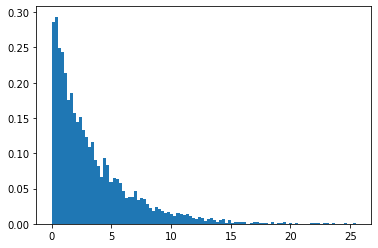

In [ ]:
# Plot
plt.hist(exponential.sample(5000), bins=100, density=True)
plt.show()

In [ ]:
# Define an exponential distribution with a trainable rate parameter
exp_train = tfd.Exponential(rate=tf.Variable(1., name="rate"), name='exp_train')
exp_train.trainable_variables

(<tf.Variable 'rate:0' shape=() dtype=float32, numpy=1.0>,)

In [ ]:
# Define the negative log likelihood
def nll(x_train, dist):
  return -tf.reduce_mean(dist.log_prob(x_train))

In [ ]:
# Define a function to compute the loss and gradients
@tf.function
def get_loss_and_grads(x_train, dist):
  with tf.GradientTape() as tape:
      tape.watch(dist.trainable_variables)
      loss = nll(x_train, dist)
      grads = tape.gradient(loss, dist.trainable_variables)
  return loss, grads

In [ ]:
# Optimize

def exponential_dist_optimisation(data, dist):

    # Keep results for plotting
    train_loss_results = []
    train_rate_results = []
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

    num_steps = 10

    for i in range(num_steps):
        loss, grads = get_loss_and_grads(data, dist)
        optimizer.apply_gradients(zip(grads, dist.trainable_variables))
        
        rate_value = dist.rate.value()
        train_loss_results.append(loss)
        train_rate_results.append(rate_value)

        print("Step {:03d}: Loss: {:.3f}: Rate: {:.3f}".format(i, loss, rate_value))

    return train_loss_results, train_rate_results

In [ ]:
# Get some data and train
sampled_data = exponential.sample(1000)
train_loss_results, train_rate_results=exponential_dist_optimisation(data=sampled_data, dist=exp_train)


Step 000: Loss: 3.377: Rate: 0.762
Step 001: Loss: 2.846: Rate: 0.556
Step 002: Loss: 2.464: Rate: 0.398
Step 003: Loss: 2.265: Rate: 0.311
Step 004: Loss: 2.218: Rate: 0.295
Step 005: Loss: 2.217: Rate: 0.296
Step 006: Loss: 2.217: Rate: 0.296
Step 007: Loss: 2.217: Rate: 0.296
Step 008: Loss: 2.217: Rate: 0.296
Step 009: Loss: 2.217: Rate: 0.296


In [ ]:
# Predicted value for the rate parameter

pred_value = exp_train.rate.numpy()
exact_value = exponential.rate.numpy()

print("Exact rate: ", exact_value)
print("Pred rate:  ", pred_value)

Exact rate:  0.3
Pred rate:   0.29608136


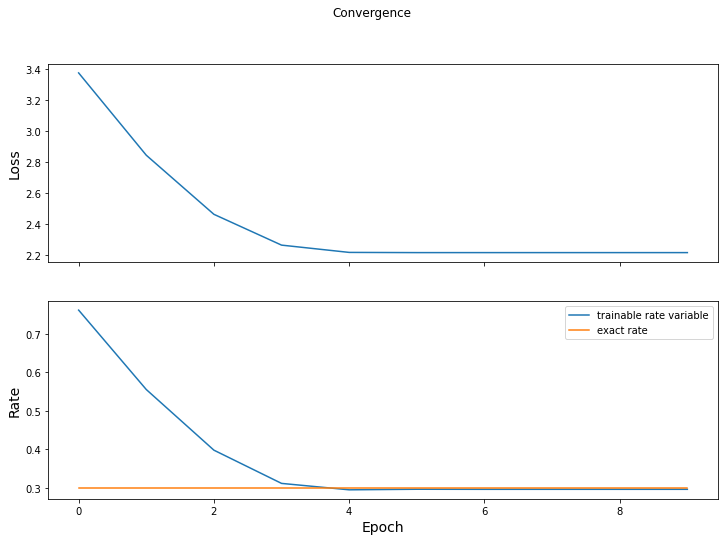

In [ ]:
# Plot to see the convergence of the estimated and true parameters

tensor_exact_value = tf.constant(exact_value, shape=[len(train_rate_results)])

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Convergence')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Rate", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_rate_results, label='trainable rate variable')
axes[1].plot(tensor_exact_value, label='exact rate')
axes[1].legend()
plt.show()

In [ ]:
# Making a function get_data which:
#   1) Fetches the 20 newsgroup dataset
#   2) Performs a word count on the articles and binarizes the result
#   3) Returns the data as a numpy matrix with the labels

def get_data(categories):

    newsgroups_train_data = fetch_20newsgroups(data_home='/path/to/20_Newsgroup_Data/',
                                               subset='train', categories=categories)
    newsgroups_test_data = fetch_20newsgroups(data_home='/path/to/20_Newsgroup_Data/',
                                              subset='test', categories=categories)

    n_documents = len(newsgroups_test_data['data'])
    count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
    train_binary_bag_of_words = count_vectorizer.fit_transform(newsgroups_train_data['data']) 
    test_binary_bag_of_words = count_vectorizer.transform(newsgroups_test_data['data']) 

    return (train_binary_bag_of_words.todense(), newsgroups_train_data['target']),  (test_binary_bag_of_words.todense(), newsgroups_test_data['target'])


In [ ]:
# Defining a function to conduct laplace smoothing. This adds a base level of probability for a given feature
# to occur in every class.

def laplace_smoothing(labels, binary_data, n_classes):
    # Compute the parameter estimates (adjusted fraction of documents in class that contain word)
    n_words = binary_data.shape[1]
    alpha = 1 # parameters for Laplace smoothing
    theta = np.zeros([n_classes, n_words]) # stores parameter values - prob. word given class
    for c_k in range(n_classes): # 0, 1, ..., 19
        class_mask = (labels == c_k)
        N = class_mask.sum() # number of articles in class
        theta[c_k, :] = (binary_data[class_mask, :].sum(axis=0) + alpha)/(N + alpha*2)

    return theta

In [ ]:
# Now we will do a function that given the feature occurence counts returns a Bernoulli distribution of 
# batch_shape=number of classes and event_shape=number of features.

def make_distributions(probs):
    batch_of_bernoullis = tfd.Bernoulli(probs=probs) # shape (n_classes, n_words)
    dist = tfd.Independent(batch_of_bernoullis, reinterpreted_batch_ndims=1)
    return dist

In [ ]:
# Function which computes the prior probability of every class based on frequency of occurence in 
# the dataset

def class_priors(n_classes, labels):
    counts = np.zeros(n_classes)
    for c_k in range(n_classes):
        counts[c_k] = np.sum(np.where(labels==c_k, 1, 0))
    priors = counts / np.sum(counts)
    print('The class priors are {}'.format(priors))
    return priors

In [ ]:
# The final function predict_sample which given the distribution, a test sample, and the class priors:
#   1) Computes the class conditional probabilities given the sample
#   2) Forms the joint likelihood
#   3) Normalises the joint likelihood and returns the log prob

def predict_sample(dist, sample, priors):
    cond_probs = dist.log_prob(sample)
    joint_likelihood = tf.add(np.log(priors), cond_probs)
    norm_factor = tf.math.reduce_logsumexp(joint_likelihood, axis=-1, keepdims=True)
    log_prob = joint_likelihood - norm_factor

    return log_prob

In [ ]:
# Now we learn the distribution using gradient tape

def make_distribution_withGT(data, labels, nb_classes):

    class_data = []
    train_vars = []
    distributions = []
    for c in range(nb_classes):
        train_vars.append(tf.Variable(initial_value=np.random.uniform(low=0.01, high =0.1, size=data.shape[-1])))
        distributions.append(tfd.Bernoulli(probs=train_vars[c]))
        class_mask = (labels == c)
        class_data.append(data[class_mask, :])

    for c_num in range(0,nb_classes):
        optimizer = tf.keras.optimizers.Adam()
        print('\n%-------------------%')
        print('Class ', c_num)
        print('%-------------------%')

        for i in range(0,100):
          loss, grads = get_loss_and_grads(class_data[c_num], distributions[c_num])
          if (i%10==0):
              print('iter:{} loss: {}'.format(i, loss))
          optimizer.apply_gradients(zip(grads, distributions[c_num].trainable_variables))

    dist = tfd.Bernoulli(probs=train_vars)
    dist = tfd.Independent(dist,reinterpreted_batch_ndims=1)

    print(dist)

    return dist


In [ ]:
# Make the same Naive Bayes classifier we did last tutorial

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

(train_data, train_labels), (test_data, test_labels) = get_data(categories)

smoothed_counts = laplace_smoothing(labels=train_labels, binary_data=train_data, n_classes=len(categories))

priors = class_priors(n_classes=len(categories), labels=train_labels)
tf_dist = make_distributions(smoothed_counts)

The class priors are [0.2359882  0.28711898 0.29154376 0.18534907]


In [ ]:
# Now train the distributions with gradient tape

GT_dist = make_distribution_withGT(data=train_data, labels=train_labels, nb_classes=4)


%-------------------%
Class  0
%-------------------%
iter:0 loss: 0.0787027418228859
iter:10 loss: 0.06930697019763886
iter:20 loss: 0.06055285062445668
iter:30 loss: 0.052445092606760044
iter:40 loss: 0.044939372411430534
iter:50 loss: 0.038000155128929944
iter:60 loss: 0.03159045456760405
iter:70 loss: 0.025670091280218136
iter:80 loss: 0.02018994665624876
iter:90 loss: 0.01510258181497036

%-------------------%
Class  1
%-------------------%
iter:0 loss: 0.07168429751793667
iter:10 loss: 0.06233526599805082
iter:20 loss: 0.05354723437645965
iter:30 loss: 0.045382024606543454
iter:40 loss: 0.037803449892935735
iter:50 loss: 0.030801066921210735
iter:60 loss: 0.024344830462277388
iter:70 loss: 0.018386375363734726
iter:80 loss: 0.01287629147574611
iter:90 loss: 0.007765474645386492

%-------------------%
Class  2
%-------------------%
iter:0 loss: 0.07832787528178087
iter:10 loss: 0.06923729617129112
iter:20 loss: 0.06084887749428448
iter:30 loss: 0.05319729436355301
iter:40 loss: 0.

In [ ]:
# Compare the two results
priors = tf.cast(priors, "float32")

for dist in [GT_dist,tf_dist]:
    probabilities = []
    for sample, label in zip(test_data, test_labels):
        probabilities.append(predict_sample(dist, sample, priors))

    probabilities = np.asarray(probabilities)
    predicted_classes = np.argmax(probabilities, axis =-1)
    print('f1 ', f1_score(test_labels, predicted_classes, average='macro'))

f1  0.09539473684210525
f1  0.7848499112849504
